In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Logistic Regression
- It belongs to the group of <b>Generalized Linear Model (GLM)</b>, which use linear regression to solve problems that cannot be solved using linear regression.
- It is a <b>classification</b> algorithm. The name regression comes from the application of <b>linear regression</b> in the middle of the computational process.
- The model used is called the <b>logistc model/logit model</b>.
- Two types of logistic regression: <b>binomial (for binary classification)</b> and <b>multinomial (for multiclass classification)</b>
- The idea is to <b>find a relationship between features and probability of particular outcome</b>.
- Widely used in medical fields such as cancer malignancy, mortality of injury, risk of certain developing diseases, etc

# Mathematical Formulation

## Estimation Formula
- GLM assume a linear relationship between the <b>link function</b> of the probability of belonging to a class and features: $$g(P(y=i)) = \sum_{i=0}^{n}\beta_ix_i$$


- Let's assume we are determining whether features belong to class 0 or 1, we want to estimates the probability $p$ of being class 1 by the linear combination of features $\beta_0 + \beta_1x + \beta_2x_2$ (for simplicity here).
- Therefore the transformation of $y = \beta_0 + \beta_1x + \beta_2x_2$ to $p$ must satisfy the conditions that the transformed value should be <b>positive and between 0 and 1</b> to represent probability.
- One reasonable way is: $$p = \frac{e^{y}}{e^{y}+1} = \frac{1}{1+e^{-y}}$$ where $S(x) = \frac{1}{1+e^{-x}}$ is called a <b>sigmoid function</b> 
- Shifting terms one get 
$$\frac{p}{1-p} = e^{y}$$ 

$$log(\frac{p}{1-p}) = y = \beta_0 + \beta_1x + \beta_2x_2$$
- So the link function is $g(x) = log(\frac{x}{1-x})$

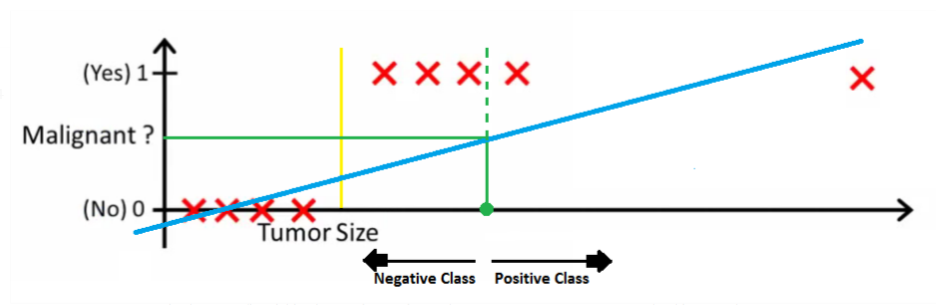

In [2]:
# cannot estimate the probability by using linear regression directly
# once there is an outlier, the originally right prediction became wrong
display.Image('img/2_logistic_tumor.png', width=500)

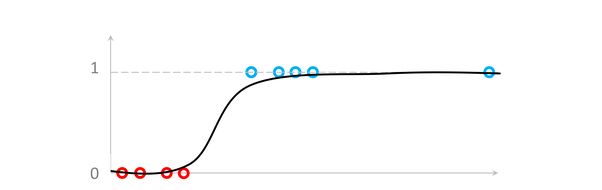

In [3]:
# result when using sigmoid function to link probability to linear regression of features
display.Image('img/2_logistic_sigmoid.png')

The reason of using sigmoid is that, many natural processes <b>exhibit a progression from small beginnings that accelerates and approaches a climax over time</b>. 

## Cost Function
- Unlike linear regression which has a convex cost function (mean square error), the <b>mean square error of sigmoid functions is non-convex</b>.
- It may cause the gradient descent to <b>get stuck in a local minimum</b> instead of the global one.

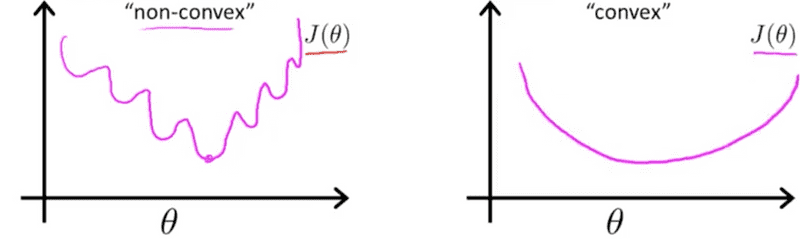

In [4]:
# the theta here is actually our beta
display.Image('img/2_logistic_non_convex.png', width=600)

- From the above section, we know that the hypothesis function is given by: <br>
    $$h_\beta(x) = \begin{cases}
                1 & \text{if } S(x) > 0.5\\
                0 & \text{if } S(x) <= 0.5
             \end{cases}
    $$
  where $S(x)$ is the sigmoid function.<br><br>
- Recall the general form of a cost function is given by: $$ J(\beta) = \frac{1}{m}\sum_{i=1}^{m}\text{Cost}(h_{\beta}(x_i),y_i)$$ where $h_{\beta}$ is the hypothesis function (i.e. function representing relationship between features and targets)<br><br>
- The $\text{Cost}$ function of logistic regression is defined as: 
$$\text{Cost}(h_{\beta}(x_i),y_i) = \begin{cases} 
                                         -log(h_\beta(x_i)) & \text{if } y_i=1\\
                                         -log(1-h_\beta(x_i)) & \text{if } y_i=0
                                    \end{cases}$$
  which can be written in one line as $$\text{Cost}(h_{\beta}(x_i),y_i) = -y_ilog(h_\beta(x_i)) - (1-y_i)log(1-h_\beta(x_i))$$is called <b>log loss</b> or <b>cross entropy</b>.<br><br>
- The negative log loss function is convex such that approaching the minimum becomes possible.

<ipython-input-5-1037cf84c9f7>:6: RuntimeWarning: divide by zero encountered in log
  return -target*np.log(p) - (1-target)*np.log(1 - p)
<ipython-input-5-1037cf84c9f7>:6: RuntimeWarning: invalid value encountered in multiply
  return -target*np.log(p) - (1-target)*np.log(1 - p)


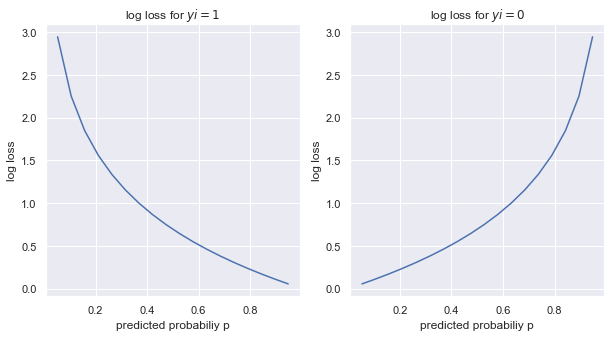

In [5]:
# visualize how the log loss penalizes probability estimated
def sigmoid(x):
    return 1/(1+np.exp(-x))

def log_loss(p, target):
    return -target*np.log(p) - (1-target)*np.log(1 - p)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
p = np.linspace(0, 1, 20)
y1 = log_loss(p, 1)
y2 = log_loss(p, 0)

# yi is the true label of ith data
# if yi=1, penalize probability prediction < 1
ax[0].plot(p, y1)
ax[0].set_title('log loss for $yi=1$')
ax[0].set_xlabel('predicted probabiliy p')
ax[0].set_ylabel('log loss')

# if yi=0, penalize probability prediction > 0
ax[1].plot(p, y2)
ax[1].set_title('log loss for $yi=0$')
ax[1].set_xlabel('predicted probabiliy p')
ax[1].set_ylabel('log loss');

# Logistic Regression with sklearn

In [6]:
# load breast cancer toy dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']
mapping = {i:x for i, x in enumerate(data['target_names'])}
df['target_name'] = df['target'].apply(lambda x: mapping[x])
print(df.shape)
df.head()

(569, 32)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
# check if dataset is balanced
df.target_name.value_counts().to_frame()

,target_name
benign,357
malignant,212


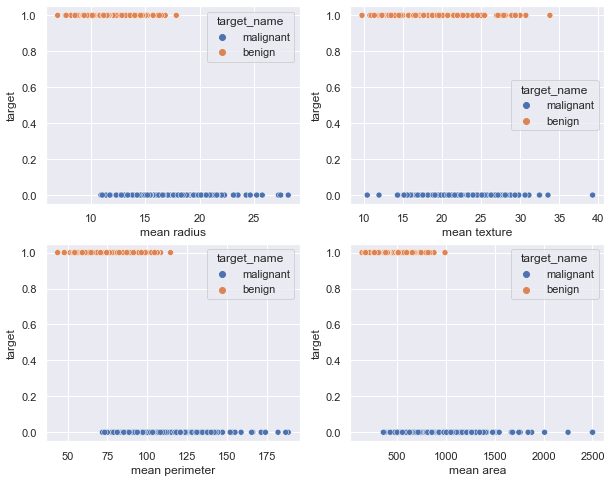

In [8]:
# draw distribution of each feature by class
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, col in enumerate(data['feature_names'][0:4]):
    sns.scatterplot(data=df, x=col, y='target', hue='target_name', ax=ax.flatten()[i]);

In [9]:
# split dataset for training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
Xtrain, Xtest, ytrain, ytest = train_test_split(data['data'], data['target'], test_size=.2, random_state=0, stratify=data['target'])
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=0)
# class_weight=balanced penalize mistakes by class weight, inversly proportional to class size
# to put more emphaisis on minority classes
# solver=liblinear, A Library for Large Linear Classification, an algorithm for opitmization, good for small dataset
# paper at: https://www.jmlr.org/papers/volume9/fan08a/fan08a.pdf

In [10]:
# tune parameters to find the best training result, default 5-fold cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 5, 10, 50],              # smaller C stronger regularization
    'max_iter': [100, 200, 500]       # max no. of iterations for solver to optimize
}
grid = GridSearchCV(model, param_grid, scoring='accuracy')
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 302 ms
{'C': 5, 'max_iter': 100}


In [11]:
# get the best model from grid search, predict test data
from sklearn.metrics import accuracy_score
model = grid.best_estimator_
yfit = model.predict(Xtest)
accuracy_score(ytest, yfit)

0.956140350877193